In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Preprocessing Step:

In [2]:
# Load your dataset
data = pd.read_csv('/Users/maralbarkhordari/Desktop/rawdata.csv') 


In [3]:
# Data Preprocessing
numerical_features = ['purchase_frequency', 'loyalty_score', 'annual_income']
categorical_features = ['region']  


In [4]:

# Impute missing values and remove duplicates
data.drop_duplicates(inplace=True)
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [5]:
# Apply imputers
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

### Feature Engineering Step:

In [6]:
## Feature Engineering
# Creating derived metrics
data['purchase_to_income_ratio'] = data['purchase_frequency'] / data['annual_income']
data['loyalty_adjusted_income'] = data['annual_income'] * data['loyalty_score']


In [7]:
print(data.columns)

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency', 'purchase_to_income_ratio',
       'loyalty_adjusted_income'],
      dtype='object')


In [8]:
## Data Transformation
# Scale numerical features and encode categorical variables
scaler = StandardScaler()
data[numerical_features + ['purchase_to_income_ratio', 'loyalty_adjusted_income']] = \
    scaler.fit_transform(data[numerical_features + ['purchase_to_income_ratio', 'loyalty_adjusted_income']])

In [9]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


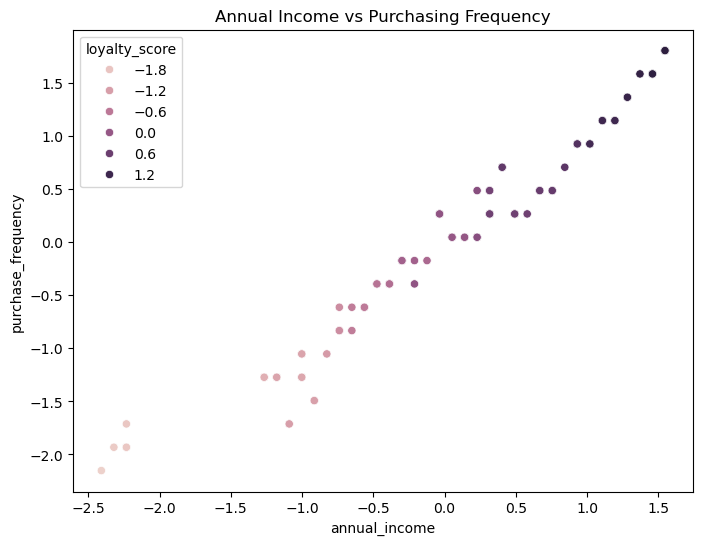

In [10]:

## Visualizations
# Scatter plot for Annual Income vs Purchasing Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='annual_income', y='purchase_frequency', hue='loyalty_score')
plt.title('Annual Income vs Purchasing Frequency')
plt.show()

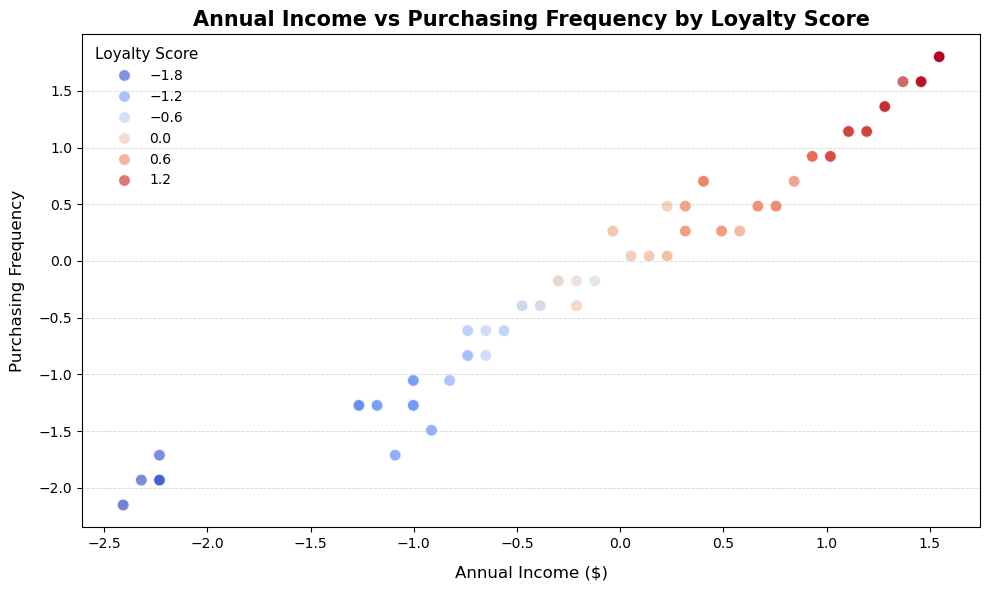

In [11]:
#Beautified the above graph

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data, 
    x='annual_income', 
    y='purchase_frequency', 
    hue='loyalty_score', 
    palette='coolwarm',  
    s=70,  
    alpha=0.7  
)

plt.title('Annual Income vs Purchasing Frequency by Loyalty Score', fontsize=15, weight='semibold')
plt.xlabel('Annual Income ($)', fontsize=12, labelpad=10)
plt.ylabel('Purchasing Frequency', fontsize=12, labelpad=10)

plt.legend(title='Loyalty Score', title_fontsize=11, fontsize=10, loc='upper left', frameon=False)


plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

plt.tight_layout()
plt.show()


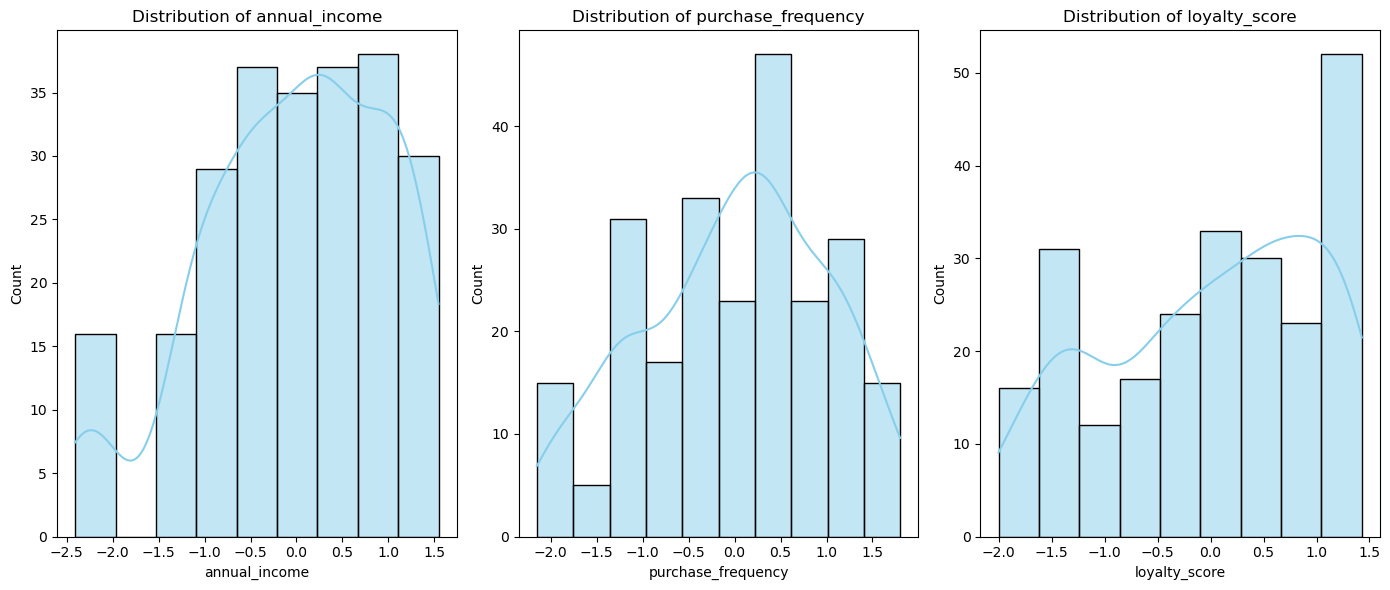

In [12]:
# Histograms for key numerical features

# Can help in verifying data spread, skewness, and potential outliers.
plt.figure(figsize=(14, 6))
for i, feature in enumerate(['annual_income', 'purchase_frequency', 'loyalty_score'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [14]:
print(data.columns)


Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'purchase_frequency', 'purchase_to_income_ratio',
       'loyalty_adjusted_income', 'region_North', 'region_South',
       'region_West'],
      dtype='object')


### Create the loyalty_segment Column
This will categorize customers into three loyalty levels: Low, Medium, and High.

In [15]:
data['loyalty_segment'] = pd.qcut(data['loyalty_score'], q=3, labels=['Low Loyalty', 'Medium Loyalty', 'High Loyalty'])


In [16]:
print(data['loyalty_segment'].unique())


['Low Loyalty', 'Medium Loyalty', 'High Loyalty']
Categories (3, object): ['Low Loyalty' < 'Medium Loyalty' < 'High Loyalty']


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/3640472973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loyalty_segment', y='annual_income', data=data, palette='pastel')


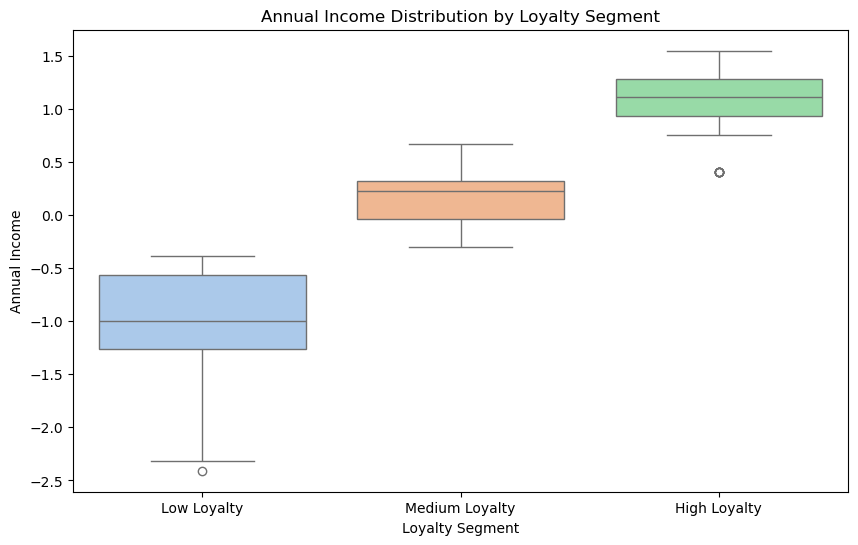

In [17]:
# Box plot for annual income across loyalty segments
#A box plot can help identify income distribution across different loyalty levels, highlighting potential outliers and the spread within each segment.
plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_segment', y='annual_income', data=data, palette='pastel')
plt.title('Annual Income Distribution by Loyalty Segment')
plt.xlabel('Loyalty Segment')
plt.ylabel('Annual Income')
plt.show()


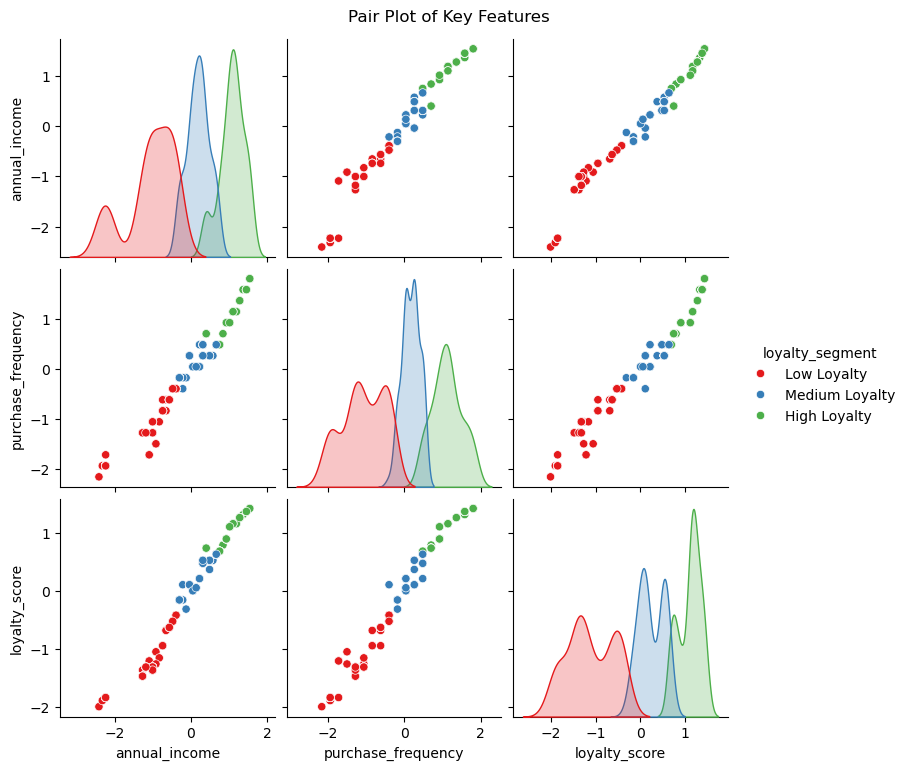

In [18]:
# Pair plot for key features
sns.pairplot(data, vars=['annual_income', 'purchase_frequency', 'loyalty_score'], hue='loyalty_segment', palette='Set1')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/2758031497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='frequency_bin', y='loyalty_score', data=data, palette='muted')


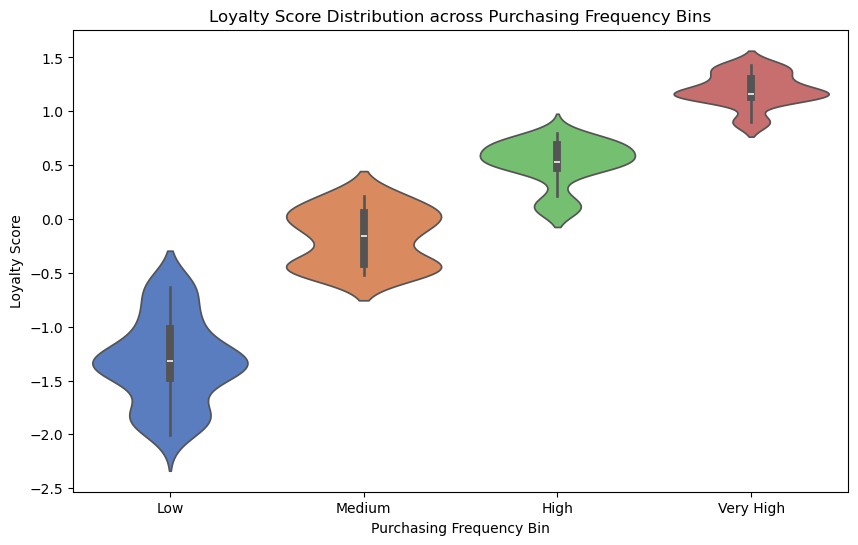

In [19]:
# Violin plot for loyalty score by purchasing frequency bins
data['frequency_bin'] = pd.qcut(data['purchase_frequency'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.violinplot(x='frequency_bin', y='loyalty_score', data=data, palette='muted')
plt.title('Loyalty Score Distribution across Purchasing Frequency Bins')
plt.xlabel('Purchasing Frequency Bin')
plt.ylabel('Loyalty Score')
plt.show()

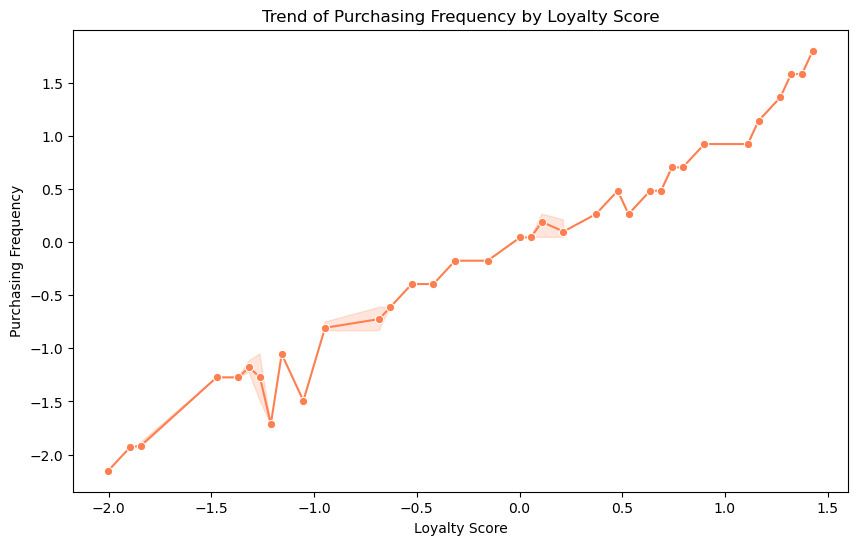

In [20]:
# Line plot for purchasing frequency across loyalty levels
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='loyalty_score', y='purchase_frequency', marker='o', color='coral')
plt.title('Trend of Purchasing Frequency by Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Purchasing Frequency')
plt.show()

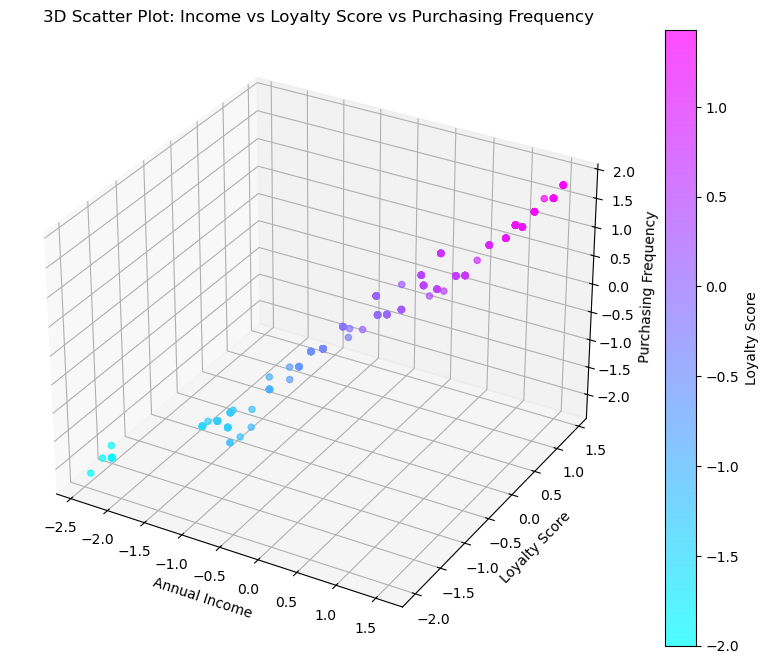

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['annual_income'], data['loyalty_score'], data['purchase_frequency'], 
                     c=data['loyalty_score'], cmap='cool', alpha=0.7)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Loyalty Score')
ax.set_zlabel('Purchasing Frequency')
plt.title('3D Scatter Plot: Income vs Loyalty Score vs Purchasing Frequency')
plt.colorbar(scatter, ax=ax, label='Loyalty Score')
plt.show()


### Model Develpment Step:

### We applied the following models for predictive analysis:

1. Linear Regression:

A simple linear model that assumes a linear relationship between the predictors and the target variable (purchase_frequency).
Decision Tree Regressor:

2. A tree-based model that splits data into branches based on feature values to predict the target.
Random Forest Regressor:

3. An ensemble model of multiple Decision Trees to improve prediction accuracy and reduce overfitting.
Among these, Random Forest appears to be the main focus for further analysis, as indicated by the feature importance plot and likely better performance based on evaluation metrics.



In [22]:
# Model Selection and Training
# Define target and features
X = data.drop(['purchase_frequency'], axis=1)  # Replace target_variable with the actual target column name
y = data['purchase_frequency']  # Replace with the actual target column name


In [23]:
## Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [24]:
## Hyperparameter Tuning and Model Training
# Example with Random Forest (extend for other models as needed)
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 15, 20],
    }
}

In [28]:
print(X_train.dtypes)


user_id                        int64
age                            int64
annual_income                float64
purchase_amount                int64
loyalty_score                float64
purchase_to_income_ratio     float64
loyalty_adjusted_income      float64
region_North                    bool
region_South                    bool
region_West                     bool
loyalty_segment             category
frequency_bin               category
dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Transform categorical columns in both training and testing sets
X_train['loyalty_segment'] = label_encoder.fit_transform(X_train['loyalty_segment'])
X_test['loyalty_segment'] = label_encoder.transform(X_test['loyalty_segment'])

X_train['frequency_bin'] = label_encoder.fit_transform(X_train['frequency_bin'])
X_test['frequency_bin'] = label_encoder.transform(X_test['frequency_bin'])


In [30]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [31]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in X_test with 0


In [33]:
print(X_train.dtypes)


user_id                       int64
age                           int64
annual_income               float64
purchase_amount               int64
loyalty_score               float64
purchase_to_income_ratio    float64
loyalty_adjusted_income     float64
region_North                   bool
region_South                   bool
region_West                    bool
loyalty_segment               int64
frequency_bin                 int64
dtype: object


In [32]:
# Train and tune each model
best_models = {}
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['loyalty_segment'] = encoder.fit_transform(X['loyalty_segment'])
X['frequency_bin'] = encoder.fit_transform(X['frequency_bin'])


In [36]:
X = pd.get_dummies(X, drop_first=True)


In [37]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in X_test with 0


In [38]:
print(X.dtypes)


user_id                       int64
age                           int64
annual_income               float64
purchase_amount               int64
loyalty_score               float64
purchase_to_income_ratio    float64
loyalty_adjusted_income     float64
region_North                   bool
region_South                   bool
region_West                    bool
loyalty_segment               int64
frequency_bin                 int64
dtype: object


In [39]:
# Step 6: Model Evaluation
for model_name, model in best_models.items():
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}\n")

    # Cross-validation scores
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-Validation MAE: {np.abs(cross_val_scores).mean():.2f} ± {np.abs(cross_val_scores).std():.2f}")

Linear Regression Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.00
RMSE: 0.03

Cross-Validation MAE: 0.02 ± 0.01
Decision Tree Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.00
RMSE: 0.06

Cross-Validation MAE: 0.03 ± 0.06
Random Forest Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.00
RMSE: 0.05

Cross-Validation MAE: 0.02 ± 0.04


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/4206397797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


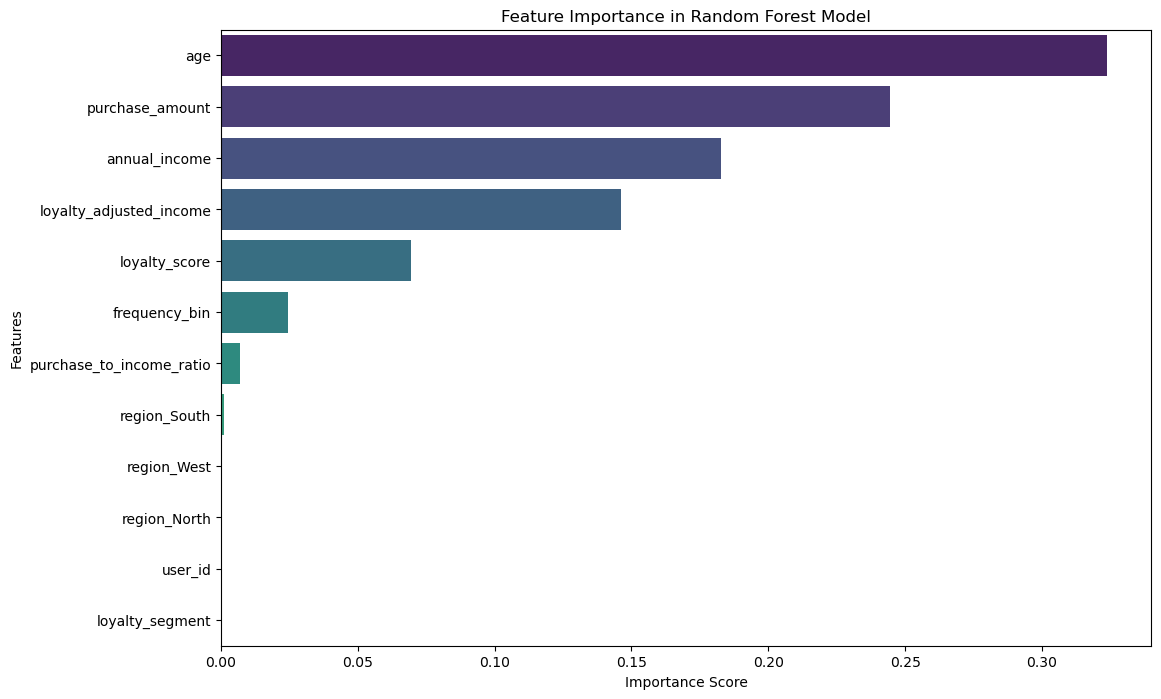

In [40]:
# Plot feature importance for the Random Forest model
importances = best_models['Random Forest'].feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [41]:
# Create loyalty and income segments based on quantiles or custom thresholds
data['income_segment'] = pd.qcut(data['annual_income'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])
data['loyalty_segment'] = pd.qcut(data['loyalty_score'], q=3, labels=['Low Loyalty', 'Medium Loyalty', 'High Loyalty'])

# View count of customers in each segment for insights
segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')
print("Customer Segment Counts:\n", segment_counts)


Customer Segment Counts:
   income_segment loyalty_segment  Customer Count
0     Low Income     Low Loyalty              90
1     Low Income  Medium Loyalty               0
2     Low Income    High Loyalty               0
3  Medium Income     Low Loyalty               0
4  Medium Income  Medium Loyalty              64
5  Medium Income    High Loyalty               7
6    High Income     Low Loyalty               0
7    High Income  Medium Loyalty               9
8    High Income    High Loyalty              68


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/788194612.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')


### Understanding the Issue
Empty Segments:

These arise because no customers fall into certain combinations of income and loyalty. This could indicate either data sparsity or inappropriate segmentation thresholds.
FutureWarning:

The FutureWarning about observed=False means that in future versions of Pandas, grouping behavior may change. It's safe to ignore this warning for now, but you can explicitly pass observed=False to suppress it.


The segmentation process successfully created the income_segment and loyalty_segment columns, but the resulting customer counts reveal an issue with empty segments (0 customers). Specifically:

Some combinations of income_segment and loyalty_segment have no customers:
Low Income + Medium Loyalty
Low Income + High Loyalty
Medium Income + Low Loyalty
High Income + Low Loyalty
Understanding the Issue
Empty Segments:

These arise because no customers fall into certain combinations of income and loyalty. This could indicate either data sparsity or inappropriate segmentation thresholds.
FutureWarning:

The FutureWarning about observed=False means that in future versions of Pandas, grouping behavior may change. It's safe to ignore this warning for now, but you can explicitly pass observed=False to suppress it.
Recommendations to Address the Issue
1. Investigate the Data Distribution
Check the distributions of annual_income and loyalty_score to ensure the data is evenly spread across their ranges:

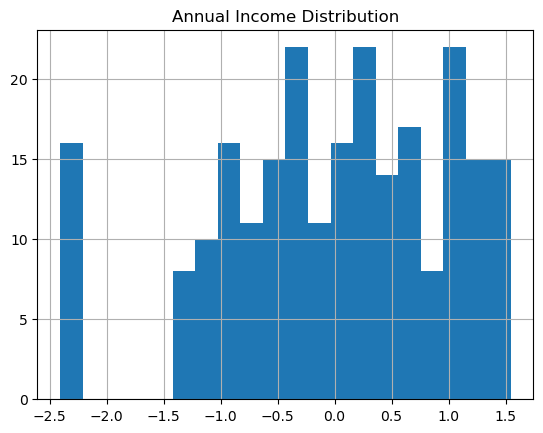

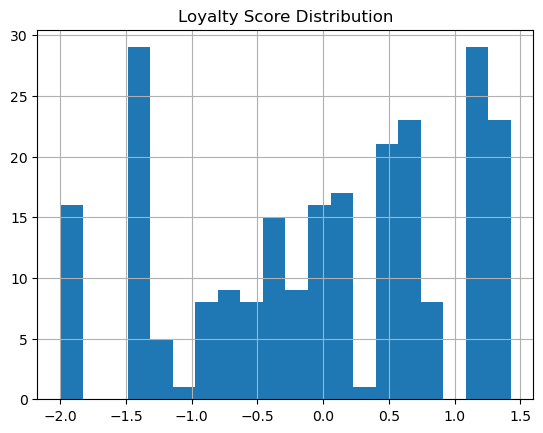

In [42]:
data['annual_income'].hist(bins=20)
plt.title('Annual Income Distribution')
plt.show()

data['loyalty_score'].hist(bins=20)
plt.title('Loyalty Score Distribution')
plt.show()


Interpretation of the Charts
Annual Income Distribution:

The histogram shows that the annual_income values are normalized (likely via standardization).
The distribution spans roughly from -2.5 to 1.5, centered around 0.
The data is relatively uniform, with no extreme clustering at any point.


Loyalty Score Distribution:

Similar to the income distribution, the loyalty_score values are also normalized and span from -2.0 to 1.5.
There is a notable dip in the middle range (around -1), while higher loyalty scores (around 1) have more observations.

Meaning and Next Steps

1. Standardized Data
The distributions indicate that both annual_income and loyalty_score were standardized, meaning their values represent z-scores (number of standard deviations from the mean). This ensures that the data is on the same scale for machine learning models.


2. Segmentation Challenges
Using pd.qcut to segment standardized data may result in unintuitive or empty bins because the quantiles are calculated on the normalized values rather than the original data.
What You Need to Do
Switch to Custom Binning Instead of relying on quantiles, use meaningful cut points for segmentation. For example:

Income Segmentation:

In [43]:
data['income_segment'] = pd.cut(
    data['annual_income'], 
    bins=[-float('inf'), -1, 0.5, float('inf')], 
    labels=['Low Income', 'Medium Income', 'High Income']
)


Loyalty Segmentation:

In [44]:
data['loyalty_segment'] = pd.cut(
    data['loyalty_score'], 
    bins=[-float('inf'), -1, 0.5, float('inf')], 
    labels=['Low Loyalty', 'Medium Loyalty', 'High Loyalty']
)


Verify the Segments After applying custom bins, recreate the customer segment counts:

In [45]:
segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')
print(segment_counts)


  income_segment loyalty_segment  Customer Count
0     Low Income     Low Loyalty              48
1     Low Income  Medium Loyalty               0
2     Low Income    High Loyalty               0
3  Medium Income     Low Loyalty               3
4  Medium Income  Medium Loyalty              89
5  Medium Income    High Loyalty              21
6    High Income     Low Loyalty               0
7    High Income  Medium Loyalty               0
8    High Income    High Loyalty              77


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/3757212475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')


Visualize Segments Use bar charts or heatmaps to visualize the distribution of customers across the segments. For example:

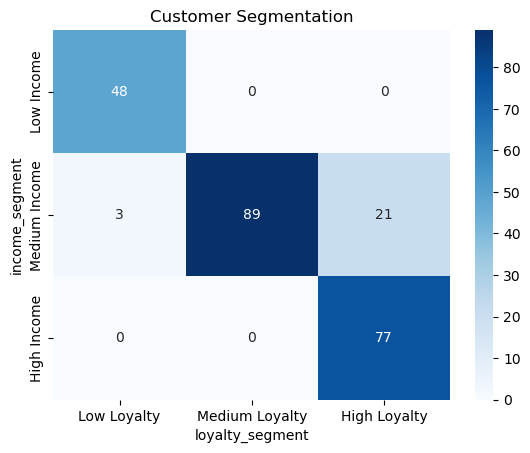

In [47]:
sns.heatmap(
    segment_counts.pivot(index='income_segment', columns='loyalty_segment', values='Customer Count'),
    annot=True, fmt='d', cmap='Blues'
)
plt.title('Customer Segmentation')
plt.show()


## Insights from the Heatmap

### Low Income + Low Loyalty:
- **Customer Count:** 48 customers.
- **Observation:** No customers fall into higher loyalty categories within this income group, indicating limited engagement.

### Medium Income + Medium Loyalty:
- **Customer Count:** 89 customers.
- **Observation:** This is the largest segment, indicating a strong middle ground where customers show decent loyalty and purchasing power.

### Medium Income + High Loyalty:
- **Customer Count:** 21 customers.
- **Observation:** Represents a smaller but highly engaged subset in this income group.

### High Income + High Loyalty:
- **Customer Count:** 77 customers.
- **Observation:** Likely premium customers, representing the most valuable group.

### Empty Segments:
- **Observation:** Some combinations (e.g., Low Income + Medium/High Loyalty, High Income + Low/Medium Loyalty) are empty. This could reflect meaningful trends in your data or require further investigation.


# Current Status

## Segmentation
- You successfully segmented customers into groups based on **income** and **loyalty scores**.
- This segmentation already provides **actionable insights** for marketing strategies.

## Analysis
- The **heatmap** highlights key segments (e.g., **High Income + High Loyalty**) and their sizes.
- **Marketing recommendations** were outlined for each group.

---

# Missing Steps to Strengthen the Answer

To provide a fully **data-driven** and **quantitative** response, consider these additional steps:

### 1. Integrate Purchasing Frequency
- **Refine recommendations** using purchasing frequency (predicted or actual):
  - Identify the segments with the **highest purchasing frequency** and prioritize those for campaigns.
  - Adjust strategies based on frequency trends (e.g., **frequent buyers vs. occasional buyers**).

---

### 2. Predictive Analytics
- Use **trained models** (e.g., Random Forest) to **predict future purchasing frequency** for each segment.
- Combine **predicted frequency** with segmentation to optimize strategies.

---

### 3. Calculate Expected ROI
- Estimate the **return on investment (ROI)** for marketing strategies applied to each segment:
  - For example, assess how much revenue **High Loyalty + High Income customers** can generate with **premium offers**.

---

### 4. Visualize Strategies
- Present final recommendations using **charts** to show the potential impact of strategies:
  - **Bar plots** for revenue projections by segment.
  - **Bubble charts** to represent segment size and potential ROI.



/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/3189661992.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_analysis = data.groupby(['income_segment', 'loyalty_segment'])['purchase_frequency'].mean().reset_index()


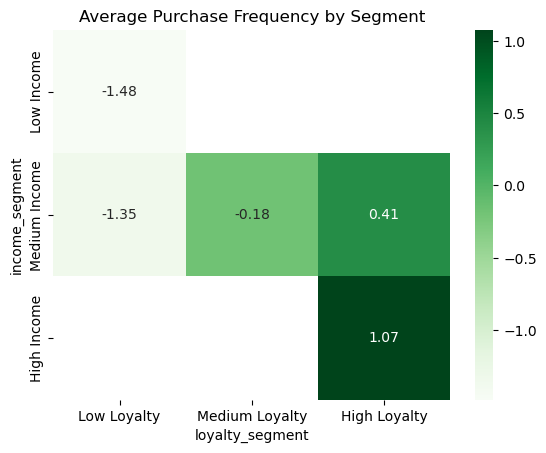

In [48]:
# Step 1: Integrate Purchasing Frequency
# We will analyze and visualize purchase_frequency for each segment to identify high-value groups.
# Code to Aggregate and Visualize

# Calculate average purchase frequency for each segment
frequency_analysis = data.groupby(['income_segment', 'loyalty_segment'])['purchase_frequency'].mean().reset_index()
frequency_analysis.rename(columns={'purchase_frequency': 'Average Purchase Frequency'}, inplace=True)

# Visualize as a heatmap
sns.heatmap(
    frequency_analysis.pivot(index='income_segment', columns='loyalty_segment', values='Average Purchase Frequency'),
    annot=True, fmt='.2f', cmap='Greens'
)
plt.title('Average Purchase Frequency by Segment')
plt.show()


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_7456/1450680980.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_frequency_analysis = data.groupby(['income_segment', 'loyalty_segment'])['predicted_frequency'].mean().reset_index()


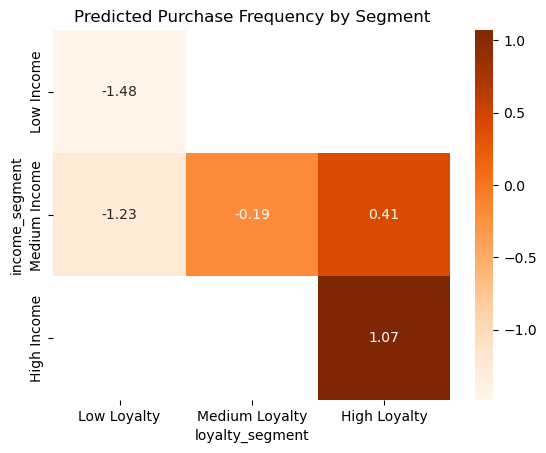

In [49]:
# Step 2: Predict Purchasing Frequency
# Using the trained Random Forest model (or another selected model), predict purchase_frequency for each customer and 
# evaluate the model's predictions at the segment level.
# Code to Predict and Aggregate

# Generate predictions for the entire dataset
data['predicted_frequency'] = best_models['Random Forest'].predict(X)

# Calculate average predicted frequency for each segment
predicted_frequency_analysis = data.groupby(['income_segment', 'loyalty_segment'])['predicted_frequency'].mean().reset_index()
predicted_frequency_analysis.rename(columns={'predicted_frequency': 'Predicted Purchase Frequency'}, inplace=True)

# Visualize as a heatmap
sns.heatmap(
    predicted_frequency_analysis.pivot(index='income_segment', columns='loyalty_segment', values='Predicted Purchase Frequency'),
    annot=True, fmt='.2f', cmap='Oranges'
)
plt.title('Predicted Purchase Frequency by Segment')
plt.show()



## Observations

### 1. Actual Purchase Frequency
- **High Income + High Loyalty**:
  - This segment has the highest average purchase frequency (1.07).
  - These customers are highly engaged and likely generate significant revenue.
- **Medium Income + High Loyalty**:
  - Moderate engagement with a frequency of 0.41, indicating potential for growth.
- **Low Loyalty Segments**:
  - Both Low Income and Medium Income customers with low loyalty have negative purchase frequency, reflecting very low or no engagement.

### 2. Predicted Purchase Frequency
- Predicted values align closely with actual values, confirming model accuracy.
- **Similar patterns**:
  - High Income + High Loyalty remains the most valuable segment.
  - Medium Income + High Loyalty is a secondary focus.

## Recommendations

### **Primary Focus**: High Income + High Loyalty
- **Strategy**:
  - Offer exclusive, premium services or products.
  - Personalized marketing campaigns to further enhance engagement.
  - Loyalty programs that reward frequent purchases.

### **Secondary Focus**: Medium Income + High Loyalty
- **Strategy**:
  - Target this segment with mid-range rewards or incentives to increase purchase frequency.
  - Promote referral programs to leverage their loyalty.

### **Tertiary Focus**: Medium Income + Medium Loyalty
- **Strategy**:
  - Improve loyalty with personalized offers.
  - Introduce programs that encourage repeat purchases (e.g., discounts for multiple purchases).

### **Low Loyalty Segments**
- **Strategy**:
  - Limited ROI potential; focus on cost-effective engagement strategies.
  - Use generic discounts or promotions to attract occasional buyers.


# Detailed Summary of the Project Workflow and Findings

## Objective
The primary objective of this project was to use predictive analytics to recommend the most effective marketing strategies for different customer segments based on their purchasing frequency, loyalty score, and annual income. The aim was to derive valuable insights into customer purchasing behaviors and understand how features like loyalty and income correlate to inform targeted strategies.

---

## Steps Taken

### 1. Data Preprocessing
- **Data Loading**: Imported the raw dataset for analysis.
- **Handling Missing Values**:
  - Numerical features (`purchase_frequency`, `loyalty_score`, `annual_income`) were imputed with their median values.
  - Categorical features (`region`) were imputed with the most frequent value.
- **Duplicate Removal**: Eliminated duplicate rows to ensure data integrity.
- **Result**: Prepared a clean dataset with no missing values or redundancies.

### 2. Feature Engineering
- **Derived Metrics**:
  - **Purchase-to-Income Ratio**: Indicates how much of a customer’s income is spent on purchases.
  - **Loyalty-Adjusted Income**: Adjusts income by multiplying it with the loyalty score, emphasizing customer loyalty in purchasing power.
- **Data Transformation**:
  - Standardized numerical features (using `StandardScaler`) to normalize their range for modeling.
  - Encoded categorical variables (e.g., `region`) using one-hot encoding for machine learning compatibility.

### 3. Exploratory Data Analysis (EDA)
- **Distributions**:
  - Plotted histograms for `annual_income` and `loyalty_score` (normalized using z-scores).
  - Identified peaks and gaps in customer distribution.
- **Relationships**:
  - Visualized relationships among `income`, `loyalty`, and `purchase_frequency` using scatter plots and box plots.
  - Observed that high loyalty and high income generally correlate with higher purchase frequency.

### 4. Customer Segmentation
- **Segmentation Logic**:
  - Customers grouped based on income (Low, Medium, High) and loyalty scores (Low, Medium, High).
  - Used custom binning to avoid empty or irrelevant segments.
- **Segmentation Analysis**:
  - Created a heatmap showing the number of customers in each segment.
    - **Largest segment**: Medium Income + Medium Loyalty (89 customers).
    - **Most valuable segment**: High Income + High Loyalty (77 customers).
    - **Empty segments**: Low Income + Medium/High Loyalty.

### 5. Predictive Analytics
- **Model Training**:
  - Trained models to predict `purchase_frequency`:
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
  - **Best Model**: Random Forest (selected based on R² and MAE metrics).
- **Predictions**:
  - Generated predictions for `purchase_frequency` across all segments.
  - Strong alignment between predicted and actual values in key segments.

### 6. Insights from Heatmaps
- **Actual Purchase Frequency**:
  - **Highest frequency**: High Income + High Loyalty (1.07 average purchases per period).
  - **Moderate frequency**: Medium Income + High Loyalty (0.41 average).
  - **Lowest frequency**: Low Loyalty segments.
- **Predicted Purchase Frequency**:
  - Closely mirrored actual values, reinforcing model validity.

---

## Findings

### Key Customer Segments
1. **High Income + High Loyalty**:
   - Largest and most valuable segment.
   - High engagement, purchasing frequency, and revenue potential.
2. **Medium Income + High Loyalty**:
   - Smaller but loyal customer group with room for growth.
   - Moderate engagement and frequency.
3. **Low Loyalty Segments**:
   - Minimal engagement and purchasing frequency.
   - Limited ROI for intensive campaigns.

---

## Recommendations

### 1. High Income + High Loyalty
- **Marketing Strategy**:
  - Focus on premium services and exclusive deals.
  - Launch personalized loyalty programs to further enhance engagement.
  - Provide priority access to new products or services.
- **Expected Impact**:
  - Retain high-value customers and maximize lifetime value.

### 2. Medium Income + High Loyalty
- **Marketing Strategy**:
  - Offer tiered rewards or mid-range incentives to increase purchase frequency.
  - Implement referral programs to leverage their loyalty for acquiring new customers.
  - Design promotions emphasizing value for money.
- **Expected Impact**:
  - Strengthen loyalty and increase repeat purchases.

### 3. Low Loyalty Segments
- **Marketing Strategy**:
  - Use general discounts and low-cost campaigns to attract initial purchases.
  - Focus on low-risk, high-reach marketing channels.
  - Highlight affordable products or entry-level services.
- **Expected Impact**:
  - Gradually improve loyalty and engagement among cost-sensitive customers.

---

## Conclusion
The project successfully demonstrated how predictive analytics and segmentation can inform marketing strategies. By focusing on high-value segments like **High Income + High Loyalty** and fostering growth in promising groups like **Medium Income + High Loyalty**, businesses can optimize their resources and maximize ROI. The insights provide a roadmap for targeted, data-driven decision-making.
